<img src="https://i.ibb.co/88jy63H/xxx-4.png"  alt="KCode Banner"/>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto:kauemandarino@gmail.com?subject=Ol%C3%A1%20-%20GitHub&amp;body=Ol%C3%A1%2C%20te%20vi%20no%20GitHub%20e%20gostaria%20de%20falar%20com%20voc%C3%AA!"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Análise exploratória dos dados

## Metodologia / Passos:
* Fazer em Excel, um dataframe com as interesecções das datas e puxar `ok`
* Fazer um dataframe com todos os valores das ações das empresas no periodo `ok`
* Tirar a média `ok`
* Calcular a variação  `ok`
* Criar um outro dataframe com a tx Selic `ok`
* Calcular a variação  `ok`
* Validar os dados `ok`
* Fazer a análise exploratória `ok`  
    Validar ou não, a hipótese de que é mais vantajoso investir em ações do setor siderúrgico do que no tesouro direto (LFTD) `ok`

In [1]:
# Importando libs
import pandas as pd
from random import randint
from datetime import date
import matplotlib.pyplot as plt

In [2]:
# Definindo funções para apresentação visual(str) dos resultados
def linha():
    print(33*'-')
def tit():
    linha()
    print(f"{titulo : ^33}")
    linha()
    print('Rendimento:')
def título():
    linha()
    print(f"{titulo : ^33}")
    linha()

# Criando o nossa série temporal, sendo:
* `'Data'` = Período da série;
* `'Vale'` = Valor das ações da empresa Vale (VALE3), na bolsa B3, no período;
* `'Gerdau'` Pref`` = Valor das ações da empresa Gerdau (GGBR4), na bolsa B3, no período;
* `'Gerdau'` Met`` Pref = Valor das ações da empresa VALE (GGBR3), na bolsa B3, no período;
* `'CSN'` = Valor das ações da empresa Siderúrgica Nacional (CSNA3), na bolsa B3, no período;
* `'Usiminas'` = Valor das ações da empresa Usiminas (USIM5), na bolsa B3, no período;
* `'Vale'` = Valor do rendimento Selic (LFTD), risco zero, no período.

In [3]:
# Puxando os dados
dir = 'C:/Users/manda/OneDrive/Documents/GitHub/Insights/Setor Siderúrgico Nacional/2 Entrega - Cliclo 2/Passo 03 e 04 - Coleta e limpeza dos dados/DataFrames/DF pronto para análise pandas.csv'
df = pd.read_csv(dir, skiprows=1, encoding='UTF8')
# Dropando coluna desnecessária
df = df.drop(columns=['Unnamed: 0'])
df.head(3)

,Data,Vale,Gerdau Pref,Gerdau Met Pref,CSN,Usiminas,Selic
0,1/31/2000,1.951422,268.362579,0.219444,1.667136,1.731119,1.46
1,2/29/2000,1.658708,263.639343,0.231984,1.566680,1.566250,1.45
2,3/31/2000,1.626185,244.209869,0.200635,1.754768,1.426112,1.45


# Aqui foi interessante, pois eu encontrei um erro:
Gerdau preferêncial e Gerdau Met preferenciais, não são empresas diferentes, são apenas
tipos de ações diferentes(Ordinárias/Preferências, sem direito a voto/com direito a voto).  
Vamos remover as ações ordinárias de nosso estudo.

In [4]:
df.drop(columns=['Gerdau Pref'], inplace=True)
df = df.rename(columns={'Gerdau Met Pref': 'Gerdau'})
df.head(3)

,Data,Vale,Gerdau,CSN,Usiminas,Selic
0,1/31/2000,1.951422,0.219444,1.667136,1.731119,1.46
1,2/29/2000,1.658708,0.231984,1.566680,1.566250,1.45
2,3/31/2000,1.626185,0.200635,1.754768,1.426112,1.45


# Agora, vamos verificar se os dados estão modelados no formato correto

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      263 non-null    object 
 1   Vale      263 non-null    float64
 2   Gerdau    263 non-null    float64
 3   CSN       263 non-null    float64
 4   Usiminas  263 non-null    float64
 5   Selic     263 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.5+ KB


## A data esta no formato str, vamos corrigir:

In [6]:
# Transformando a coluna 'Data' em 'TimeStamp'
df['Data']= pd.to_datetime(df['Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      263 non-null    datetime64[ns]
 1   Vale      263 non-null    float64       
 2   Gerdau    263 non-null    float64       
 3   CSN       263 non-null    float64       
 4   Usiminas  263 non-null    float64       
 5   Selic     263 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 12.5 KB


In [7]:
# Transformando a coluna 'Data' em DateTimeIndex
index = pd.DatetimeIndex(df['Data'])
df.set_index('Data', inplace=True)
df.head(3)

,Vale,Gerdau,CSN,Usiminas,Selic
Data,,,,,
2000-01-31,1.951422,0.219444,1.667136,1.731119,1.46
2000-02-29,1.658708,0.231984,1.566680,1.566250,1.45
2000-03-31,1.626185,0.200635,1.754768,1.426112,1.45


## Agora, antes de tirar a média entre as 4, iremos verificar existem `outliers`.

<AxesSubplot:xlabel='Data'>

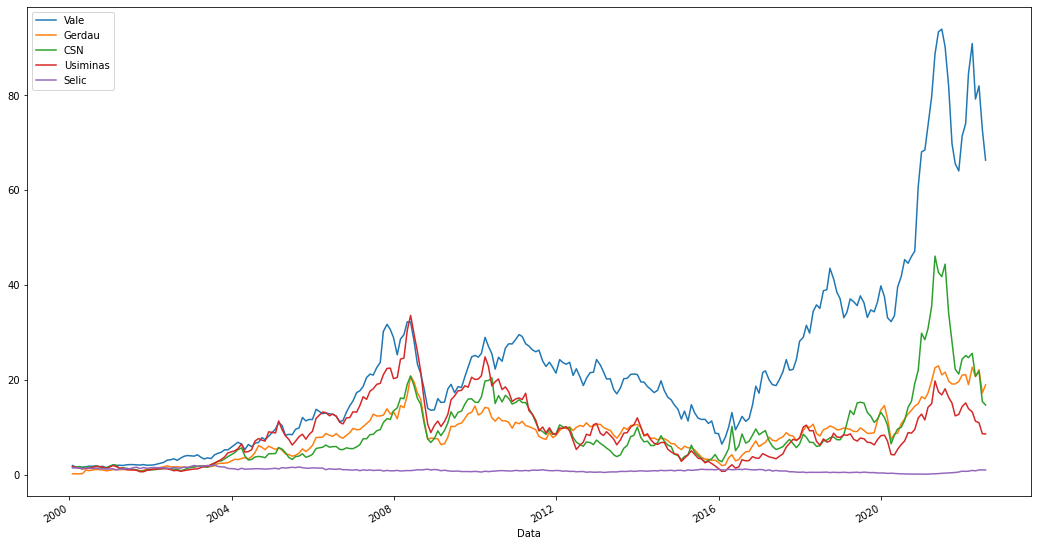

In [8]:
df.plot(figsize=(18, 10))


# Diminuindo o intervalo temporal
## Decidi pela remoção dos dados mais antigos, pois não aparentam ser dados de alta confiabilidade, são dados muito antigos, e as fontes dão indicativos de serem normalizados.

# Então vamos remover este período não confiável.

<AxesSubplot:xlabel='Data'>

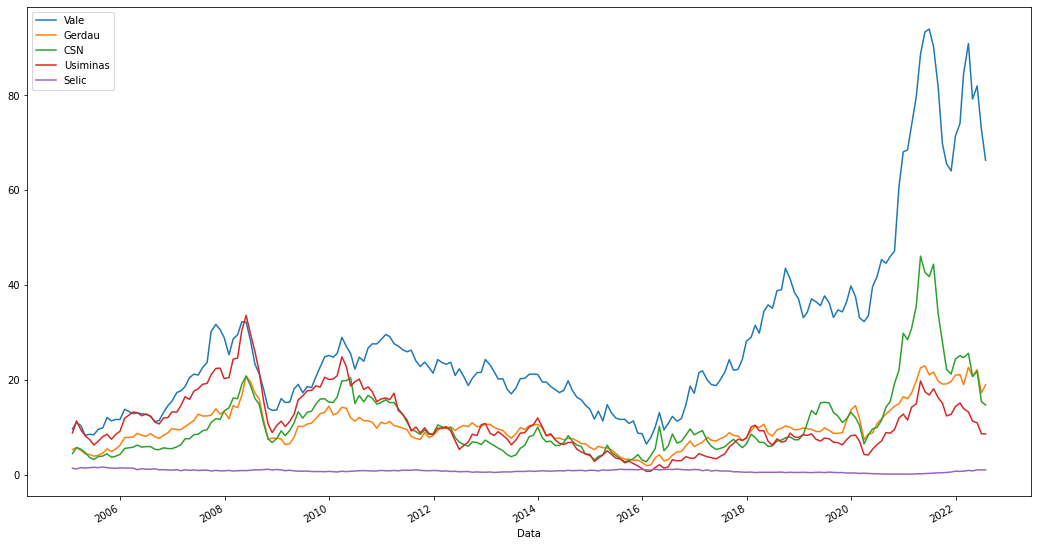

In [9]:
# Removendo o período:
# df = df[(df_var.index >= data_inicial) & (df_var <= data_atual)]
df = df[df.index >= '01-01-2005']
df.plot(figsize=(18,10))

# Modelando nossos dados

In [17]:
# Inserindo uma coluna com a média do valor das ações
df['Média ações'] = ((df['Vale'] + df['Gerdau'] + df['CSN'] +df['Usiminas'])/4)
df.head(3)

,Vale,Gerdau,CSN,Usiminas,Selic,Média ações
Data,,,,,,
2005-01-31,9.659540,5.327970,4.479893,8.820462,1.38,59.489308
2005-02-28,11.037731,5.712520,5.745207,11.359438,1.22,59.489308
2005-03-31,10.366929,5.169133,5.411780,9.479932,1.53,59.489308


## Calculando a variância percentual
 * Como estamos trabalhando com duas medidas diferentes: `Valor das ações`, e `% da Selic`, temos que padronizar estes valores para podemos analisá-los

In [ ]:
# Reduzindo o dataframe
df_filtrado = df[['Média ações', 'Selic']]
df_filtrado.head(3)


In [ ]:
# Calculando variação percentual
df_filtrado.insert(loc = 1, column = 'Δ% Ações', value = round(df_filtrado['Média ações'].pct_change()*100, 2))
df_filtrado.insert(loc = 3, column = 'Δ% Selic', value = round(df_filtrado['Selic'].pct_change()*100, 2))

# Criando um data frame só com as variáveis
df_var = df_filtrado[['Δ% Ações', 'Δ% Selic']]
df_var.plot(figsize=(18,10))

# Os gráficos acima é apenas para visualizar se o dataframe foi criado de maneira correta, sendo necessário ainda agrupar os valores para a análise exploratória
> Os dados estão tipados e estruturados, agora, antes da análise de fato, vamos revalidá-los

# Revalidação dos dados

A seguir vou revalidar os dados, para conferir se eles ainda estão
consistentes, e não se corromperam em algum momento do processo.  
Lembrando que eles já foram validados anteriormente.  
Itens a serem validados: 
* 3 Valores Selic aleatórios `ok`
* 3 cotações aleatórias
* 1 variação

In [ ]:
df.shape

In [ ]:
# Gerando fatores aleatórios para a verificação
rows = [randint(0,210), randint(0,210), randint(0,10)]

In [ ]:
# Puxando valores para conferência
linha()
print("Conferência Selic".center(33))
for row in rows:
    linha()
    print(f"{df.index[row].date()} | {df['Selic'][row]}".center(33))
linha()

* Lembrando que cada vez que eu rodo o código, o fator aleatório de conferência muda,
foi conferido a primeira vez, conforme a tabela abaixo, e estava ok.

Dados extraídos de contabeis.com.br [Fonte]("https://www.contabeis.com.br/tabelas/selic/")  
<img src="https://i.ibb.co/jJ19bdQ/validacao.png"  alt="Validação"/> 
>Os dados da Selic estão consistentes

In [ ]:
# Gerando novos fatores aleatórios para a verificação
# Dessa vez, eu comentei o código usado, e fixei os valores gerados aleatóriamente como strg,
# para não dar o mesmo erro acima.:

# linha()
# print('Ações à validar'.center(33))
# linha()
# colunas = [randint(1,5), randint(1,5), randint(1,5)]
# linhas = [randint(0,263), randint(0,263), randint(0,263)]
# for c in range (0,3):
#    print(f'Colunas: {colunas[c]} | Linha: {linhas[c]}'.center(33))
#linha()

print(
'''---------------------------------
         Ações à validar         
---------------------------------
      Colunas: 4 | Linha: 58     
     Colunas: 3 | Linha: 153     
      Colunas: 2 | Linha: 16     
---------------------------------''')

In [ ]:
df.columns

In [ ]:
titulo = 'Cotações à validar'
título()
print(f"{df.index[58].date()} |Usiminas| R$ {df['Usiminas'].iloc[58]:.2f}")
print(f"{df.index[153].date()} |CSN     | R$ {df['CSN'].iloc[153]:.2f}")
print(f"{df.index[16].date()} |Gerdau  | R$ {df['Gerdau'].iloc[16]:.2f}")
linha()

Usiminas `ok` [Fonte]('https://finance.yahoo.com/quote/USIM5.SA/history?period1=1262131200&period2=1262476800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true')
CSN 

# Análise exploratória dos dados:

## Metodologia
* Nesta etapa vamos utilizar os dados para validar a nossa hipótese. 

Hipotése: Investir em ações do setor siderúrgico nacional compensa.

O que é compensar?, para responder esta pergunta nesta etapa, vamos comparar o rendimento das ações com o investimento risco zero(SELIC),  
se o rendimento das ações for significantemente maior que o da SELIC, significará que compensa o risco; Se o rendimento das açõe for menor   
ou próximo ao rendimento da SELIC, não compensa o risco. Neste caso seria melhor fazer este aporte no tesouro direto(SELIC) que o risco é zero,  
ou em algum outro investimento mais lucrativo. 


#### Abaixo vamos plotar um gráfico muito importante para nossa análise, nele vamos agrupar a soma das variações anuais? 

In [ ]:
df_var.reset_index().groupby(pd.Grouper(key='Data', freq='Y')).sum().plot(figsize=(18,10), title='Evolução Anual das Variações das Ações e Selic')

Como podemos notar acima, não houve uma grande diferença entre um indicador e outro no geral, tendo inclusive nos dois últimos anos a Selic tido um rendimento   
maior que a média das ações. Estes dois fatos são indicadores que nossa hipótese é invalida.
Abaixo vamos destrinchar melhor estes dados:

In [ ]:
titulo = 'Periodo todo(16a.)'

# Calculando as variações:
acoes = df_var['Δ% Ações'].sum()
selic = df_var['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp22a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

De cara já vemos que que no periodo `macro` as ações renderam mais que que a Selic  
Agora vamos ver os períodos `micro`

In [ ]:
# Filtrando o periodo:
titulo = '10 anos'
data_atual = '2022-07-29' 
data_inicial = '2012-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp10a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '5 anos'
data_atual = '2022-07-29' 
data_inicial = '2017-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp5a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '3 anos'
data_atual = '2022-07-29' 
data_inicial = '2019-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp3a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '2 anos'
data_atual = '2022-07-29' 
data_inicial = '2010-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp2a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '1 ano'
data_atual = '2022-07-29' 
data_inicial = '2010-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp1a = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

In [ ]:
# Filtrando o periodo:
titulo = '3 meses'
data_atual = '2022-07-29' 
data_inicial = '2010-04-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

# Calculando as variações:
acoes = df_filtrado['Δ% Ações'].sum()
selic = df_filtrado['Δ% Selic'].sum()
maior = 'Ações' if max(acoes, selic) == acoes else 'Selic' 
diferenca = max(acoes, selic) - min(acoes, selic)

# Armazendo os resultados em um dicionário 
vp6m = {'Ações' : acoes, 'Selic': selic, 'Maior' : maior, 'diferença': diferenca}

# Exibindo resultados
tit()
print(f"Δ% Ações: {acoes : >23.2f}")
print(f"Δ% Selic: {selic : >23.2f}")
linha()
print(f"{maior} renderam  {diferenca : .2f}% a mais")
linha()

### Agora vamos fazer um comparativo dos rendimentos, contemplando apenas os últimos 12 meses.

In [ ]:
data_atual = '2022-07-29' 
data_inicial = '2021-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]

df_filtrado.reset_index().groupby(pd.Grouper(key='Data', freq='M')).sum().plot(figsize=(18,10), title='Comparativo de Rendimentos Últimos 12 mesês')

### Agora, para prever a tendência, vamos calcular a média móvel, nos baseando nos últimos 5 meses.

In [ ]:
# Criando um sub dataframe
data_atual = '2022-07-29' 
data_inicial = '2021-07-29'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_atual)]
df_analise = (df_filtrado.reset_index().groupby(pd.Grouper(key='Data', freq='M')).sum()).copy()


# Calculando a média móvel
df_analise['Média Movel Selic'] = df_analise['Δ% Selic'].rolling(5).mean()
df_analise['Média Movel Ações'] = df_analise['Δ% Ações'].rolling(5).mean()



# Plotando o gráfico
df_analise = df_analise.drop(columns=['Δ% Selic', 'Δ% Ações'])
df_analise = df_analise.drop(['2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31'])
df_analise.plot(figsize=(18,10), title='Comparativo de Médias Movéis')

# Comparando as médias Movéis

### Podemos observar que existe uma tendência de o investimento Selic(`RISCO ZERO`) ter um rendimento maior que a média das maiores empresas do setor siderúrgico.  
### Embora no passado o rendimento médio das ações tenha sido maior:

In [ ]:
data_final = '2020-12-31' 
data_inicial = '2015-1-1'
df_filtrado = df_var[(df_var.index >= data_inicial) & (df_var.index <= data_final)]
df_analise = (df_filtrado.reset_index().groupby(pd.Grouper(key='Data', freq='Y')).sum()).copy()
df_analise.plot(figsize=(18,10), title='Comparativo de Rendimentos 2015 ~ 2020')



## Porém podemos ver que as ações da vale tiveram um desempenho maior que as outras.

In [ ]:
df.plot(figsize=(18,10))

## Então, vamos comparar só a vale

In [ ]:
# Reduzindo o dataframe
df_filtrado = df[['Vale', 'Selic']]

df_filtrado.insert(loc = 1, column = 'Δ% Vale', value = round(df_filtrado['Vale'].pct_change()*100, 2))
df_filtrado.insert(loc = 1, column = 'Δ% Selic', value = round(df_filtrado['Selic'].pct_change()*100, 2))

# Criando um data frame só com as variáveis
df_var = df_filtrado[['Δ% Vale', 'Δ% Selic']]
df_var.reset_index().groupby(pd.Grouper(key='Data', freq='Y')).sum().plot(figsize=(18,10), title='Evolução Anual das Variações Vale x Selic')

### Mesmo se compararmos só da Vale, que teve o maior resultado do setor, a Selic ainda esta maior.
#### Isto quer dizer, nem se for para investir na melhor empresa do setor, ainda assim, o risco zero estará melhor.

# CONCLUSÃO:
* Hipótese de que compensa investir em ações do setor siderúrgico `hoje` foi inválidada pelos dados: 

### Desaconselho o investimento no setor siderúrgico hoje;
### Aconselho reavaliação em seis mesês;
### Aconselho a aplicação da mesma metodólogia para a análise do rendimento no setor alimentício, ou investimento na Selic.
* Devido a guerra na Europa, fala-se em um possível crise alimentar mundial, sendo o Brasil um seleiro alimentar, a tendência é de alta nas ações. 

# Justificativa:

Usamos para comparação um investimento risco zéro(Selic).

A tendência atual de rendimento do investimento nas ações é menor do que a Selic.  
`Logo, atualmente, é mais sábio investir no risco zero e ter uma tendência de lucro maior.`  
`Outra possibilidade, é investir em um outro setor, que esteja com tendência de rendimento maior do que a Selic`.

Porém esse quadro pode se inverter nos próximos semestres, como já aconteceu no passado.

Com a tecnologia criada neste projeto, é possivel replicar e escalonar, o estudo desenvolvido, ou seja, se quisermos refazer esta análise em 6 meses,  
ou analisarmos outros setores da indústria será possível, `com poucas linhas de código`.




> Obrigado pela atenção